## <center>TASK 3: Pizza Place Sales Analysis</center>

In [1]:
# Importing all the necessary libraries and creating their aliases.
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

import scipy.stats as stats 

from scipy.stats import kurtosis

import warnings
warnings.filterwarnings('ignore')

### 1. Importing the csv files

In [2]:
orders = pd.read_csv(r"C:\Users\amega\OneDrive\Dokumente\Personal\TechCrushBootCamp\Tasks\Pizza+Place+Sales\pizza_sales\orders.csv")

orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [3]:
order_details = pd.read_csv(r"C:\Users\amega\OneDrive\Dokumente\Personal\TechCrushBootCamp\Tasks\Pizza+Place+Sales\pizza_sales\order_details.csv")

order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [4]:
pizzas = pd.read_csv(r"C:\Users\amega\OneDrive\Dokumente\Personal\TechCrushBootCamp\Tasks\Pizza+Place+Sales\pizza_sales\pizzas.csv")

pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [5]:
# Using 'unicode_escape' to handle special characters in the pizza names or ingredients.
pizza_types = pd.read_csv(r"C:\Users\amega\OneDrive\Dokumente\Personal\TechCrushBootCamp\Tasks\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding='unicode_escape')

pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [52]:
# Importing the dictionary which will serve as a legend or guide for our project
# We need the dictionary to know how the various tables relate so we can merge them.

data_dictionary = pd.read_csv(r"C:\Users\amega\OneDrive\Dokumente\Personal\TechCrushBootCamp\Tasks\Pizza+Place+Sales\data_dictionary.csv")

data_dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


### 2. Before answering the questions, we need to merge these "tables". Using the dictionary data as a reference point, we now join the four tables together. We use the Foreign Keys (the shared ID columns) to join them.
### We also check each column to be sure they have appropriate data types. Null values are also checked for each column.

In [7]:
# The logic Behind the Merge:
# 1. Join Order Details with Orders (on: order_id)
# 2. Join that with Pizzas (on: pizza_id)
# 3. Join that with Pizza Types (on: pizza_type_id)

merged_df = order_details.merge(orders, on='order_id')\
    .merge(pizzas, on='pizza_id')\
    .merge(pizza_types, on='pizza_type_id')

merged_df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [8]:
# Creating a copy from the original merged dataset so we can work on the copy instead

pizza_sales = merged_df.copy()

In [9]:
# Checking the first 7 rows in our copied dataset

pizza_sales.head(7)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."


In [10]:
# Checking the first 7 rows in our copied dataset

pizza_sales.tail()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [11]:
# Checking if all the columns have the appropriate datatype

pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [12]:
# The date column is seen as a string so we convert it to datetime dtype

pizza_sales['date'] = pd.to_datetime(pizza_sales['date'])

In [13]:
# The time column is seen as a string so we convert it to datetime dtype

pizza_sales['time'] = pd.to_datetime(pizza_sales['time'])

In [14]:
# Date and Time column dtype fixed

pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [15]:
# Checking for null values in the individual columns

pizza_sales.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

## 3. Answering The Questions

### a. What is the total revenue/sales?

In [16]:
# Creating an extra column called revenue

pizza_sales['revenue'] = pizza_sales['quantity'] * pizza_sales['price']

pizza_sales.head(4)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,2026-02-14 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,2026-02-14 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,2026-02-14 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,2026-02-14 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75


In [17]:
# Calculating the total revenue/sale. Assuming the currency is cedis

total_revenue = pizza_sales['revenue'].sum()
print(f'The Total Revenue: ${total_revenue:,.2f}')

The Total Revenue: $817,860.05


### Insight: Financial Performance
The pizza place generated a total revenue of $817,860.05 over the one year. This indicates a healthy, mid-sized operation.

### b. Find the total quantity sold.

### We are looking for the total number of pizzas that were actually prepared and served. If you just count the rows in the table, you'll get 48,620. But since some rows have a quantity of 2, 3, or 4, we must sum the quantity column to get the true number.

In [18]:
print(len(pizza_sales)) # This does not give a true reflection of the total quantity sold.

48620


In [19]:
# Calculating the total quantity sold
total_quantity_sold = pizza_sales['quantity'].sum()

print(f'The Total Quantity Sold: {total_quantity_sold}')

The Total Quantity Sold: 49574


In [20]:
# Quick check for my insight

pizzas_per_day = total_quantity_sold / 365
print(f'The number of pizza prepared per day: {pizzas_per_day:.2f}')

The number of pizza prepared per day: 135.82


### Based on the result we have from the total quantity sold, we draw our insight on the *OPERATIONAL KITCHEN INPUT*
* With 49,574 pizzas sold over 365 days, the kitchen prepares an average of 136 pizzas per day. This indicates a high-volume operation that requires consistent staffing and inventory management to keep this pace of production going.

### c. Find the total orders.

### To find the Total Orders, we need to know how many customers went through the system. Since our table has 48,620 rows, counting rows would give us a number much higher than the actual number of orders. We need to count each order_id only once.

In [21]:
# Calculating the total orders by focusing on the number of customers who bought pizza since they were all given a receipt.
# The 'nunique' method tells Python to look at the order ID column, and even if ID #2 appears five times, only count it once.

total_orders = pizza_sales['order_id'].nunique()
print(f'Total orders for the year: {total_orders}')

Total orders for the year: 21350


In [22]:
# Quick check for my insight

pizzas_per_order = total_quantity_sold / total_orders
print(f'The average customer buys approximately {pizzas_per_order:.1f} pizzas when they order/visit.')

The average customer buys approximately 2.3 pizzas when they order/visit.


### My Insight Focus
- The restaurant processed 21,350 unique orders throughout the year. This represents the actual foot traffic or transaction count. When viewed alongside our total quantity of 49,574, we can confirm that the average customer is buying approximately 2.3 pizzas per visit.

### d. How many pizza types do they sell?

* To find out how many different types of pizzas are on the menu, we look at the name column on the pizza_sales table by applying the nunique method to avoid counting a pizza type that appears more than once.

In [23]:
# Finding the number of pizza types they sell

pizza_sales['name'].nunique()

32

### My Insight: Menu Variety
* The pizza place offers a diverse menu consisting of 32 unique pizza types. These types are spread across different categories (Classic, Chicken, Supreme, and Veggie), providing a wide range of options to cater to various customer preferences.

In [24]:
pizza_sales.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,1,hawaiian_m,1,2015-01-01,2026-02-14 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,2026-02-14 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,2026-02-14 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,2026-02-14 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,2026-02-14 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


### e. Find the average price of the pizzas.

In [25]:
# Calculating the average price of each pizza

avg_price_of_pizzas = pizza_sales['price'] = pizza_sales['price'].mean()
print(f'The average price of pizzas is ${avg_price_of_pizzas:.2f}')

The average price of pizzas is $16.49


### My Insight: Average Unit Price
* The average price per pizza sold is $16.49. This suggests that the restaurant’s pricing strategy is well-balanced. This figure can be used as a benchmark; any new pizzas added to the menu should likely be priced near this point to remain attractive to the current customer base.

### f. What are the peak hours of sales?

#### To answer this question properly, we need to use visualization.Visuals tell the story better than numbers 

In [26]:
# Extracting the hour from the 'time' column

pizza_sales['hour'] = pizza_sales['time'].dt.hour # This creates a new column containing only the hour (0 to 23)

In [27]:
# Grouping the data by hour
# We use nunique('order_id') to count how many distinct customers 
# placed orders during that specific hour.
# Using '.count()', will give a single large order of 10 pizzas which would make that hour look 10x busier than
# it actually was. Using '.nunique()' tells you exactly how many receipts were generated (the actual foot traffic).

hourly_sales = pizza_sales.groupby('hour')['order_id'].nunique().reset_index()

In [28]:
# Rename columns for clarity before plotting
hourly_sales.columns = ['Hour', 'Total_Orders']

hourly_sales

,Hour,Total_Orders
0,9,1
1,10,8
2,11,1231
3,12,2520
4,13,2455
5,14,1472
6,15,1468
7,16,1920
8,17,2336
9,18,2399


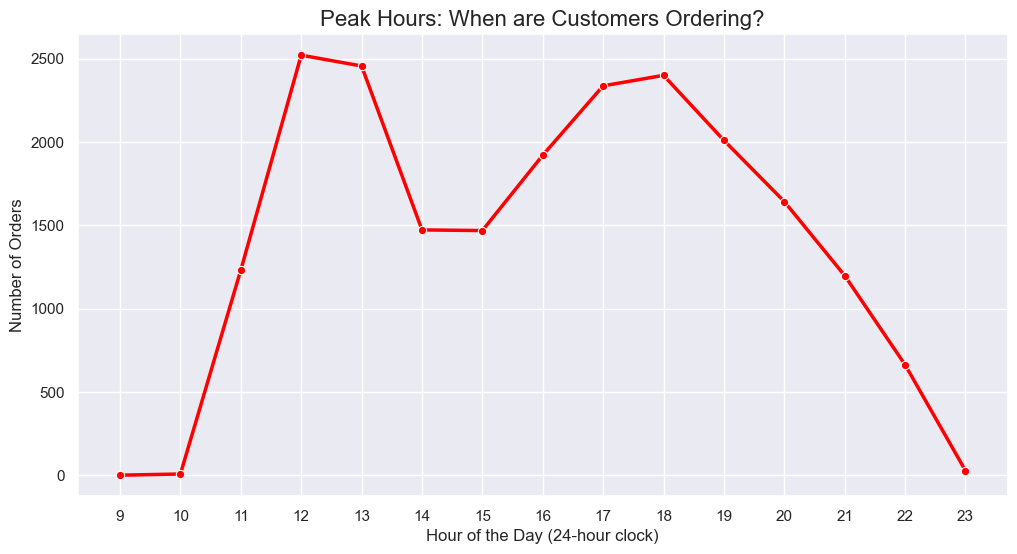

In [29]:
# Plotting our line chart

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x='Hour', y='Total_Orders', marker='o', color='red', linewidth=2.5)

# Add titles and labels
plt.title('Peak Hours: When are Customers Ordering?', fontsize=16)
plt.xlabel('Hour of the Day (24-hour clock)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Set the x-axis to show every hour clearly
plt.xticks(range(min(hourly_sales['Hour']), max(hourly_sales['Hour'])+1))

plt.show()

### My Two Insights:

> 1. The Lunch and Dinner Rushes
The distribution of sales shows two distinct peaks throughout the day. The Lunch Rush occurs between 12:00 and 13:00, followed by a significant drop between 14:00 and 15:00. There is also a significant peak between 17:00 and 18:00. The lunch peak is noticeably higher than the dinner peak, indicating that the majority of the revenue is generated in the afternoon hours.

> 2. Peak Hours & Staffing Optimization
Based on the hourly trend, sales are lowest before 11:00 and drop off sharply after 22:00. Management can optimize labour costs by scheduling a "skeleton crew" during the mid-afternoon quiet (14:00–15:00) and ensuring maximum kitchen capacity is available during the peak hours of the day to minimize order wait times.

### g. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [30]:
# Extracting the days from the 'date' column

pizza_sales['day_of_the_week'] = pizza_sales['date'].dt.day_name()

# Grouping by day name and suming the revenue
daily_sales = pizza_sales.groupby('day_of_the_week')['revenue'].sum().reset_index()

# Sorting the days correctly to avoid alphabetical order arrangements
# Creating a list to hold the days in their correct order
days_in_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Using the categorical method in pandas to force the arrangement of the days to stay same as created in the list.
daily_sales['day_of_the_week'] = pd.Categorical(daily_sales['day_of_the_week'], categories=days_in_order, ordered=True)

# Using the sort_value method to arrange the days in their appropriate order in the table
daily_sales = daily_sales.sort_values('day_of_the_week')

daily_sales

,day_of_the_week,revenue
1,Monday,107329.55
5,Tuesday,114133.80
6,Wednesday,114408.40
4,Thursday,123528.50
0,Friday,136073.90
2,Saturday,123182.40
3,Sunday,99203.50


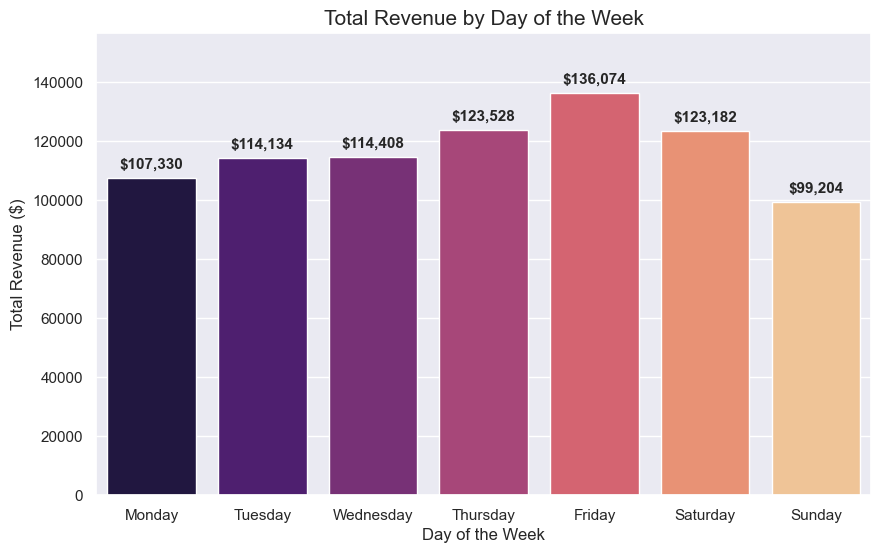

In [31]:
# Creating a figure
plt.figure(figsize=(10,6))

# Create the vertical bar chart using days as categories and revenue as the height
ax = sns.barplot(data=daily_sales, x='day_of_the_week', y='revenue', palette='magma')

# Loop through each bar in the chart to add a data label
for p in ax.patches:
    # Add text: Format the height as currency with a '$' and thousands separators
    ax.annotate(f'${p.get_height():,.0f}', 
                # Position text at the horizontal center and vertical top of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',           # center horizontally, align bottom of text to the point
                xytext=(0, 5),                      # pushing the text 5 points upward
                textcoords='offset points',
                fontsize=11, weight='bold')         # make the numbers bold for better visibility

# Set the main title of the chart with a larger font
plt.title('Total Revenue by Day of the Week', fontsize=15)
# Label the X-axis for clarity
plt.xlabel('Day of the Week', fontsize=12)
# Label the Y-axis to indicate the currency unit
plt.ylabel('Total Revenue ($)', fontsize=12)

# Increase the vertical limit to ensure the labels don't touch the top frame
plt.ylim(0, daily_sales['revenue'].max() * 1.15)

plt.show()

### My Insight: Weekly Sales Distribution
> The analysis reveals that Friday is the busiest day of the week, generating the highest total revenue. This shows how customers celebrate the end of the work week. Thursdays and Saturdays follow closely behind Friday total revenues, while Sundays and Mondays typically show the lowest sales volume.

> To answer the question, "Which day of the week is when sales are made the most?", it is on Fridays.

### h. Find the top 5 bestselling pizzas.

#### To find the Top 5 Bestselling Pizzas, we have to decide what "bestselling" means. Usually, it means one of two things:

- By Revenue: Which pizzas brought in the most money?
- By Quantity: Which pizzas were ordered the most often?

  > Due to this, two charts will be plotted side by side to solve a problem where a pizza might be sold a lot (high quantity) but makes very little money because it's too cheap.

In [32]:
pizza_sales.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue,hour,day_of_the_week
0,1,1,hawaiian_m,1,2015-01-01,2026-02-14 11:38:36,hawaiian,M,16.494132,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,2026-02-14 11:57:40,classic_dlx,M,16.494132,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday
2,3,2,five_cheese_l,1,2015-01-01,2026-02-14 11:57:40,five_cheese,L,16.494132,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday
3,4,2,ital_supr_l,1,2015-01-01,2026-02-14 11:57:40,ital_supr,L,16.494132,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday
4,5,2,mexicana_m,1,2015-01-01,2026-02-14 11:57:40,mexicana,M,16.494132,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday


In [33]:
# Top 5 bestselling pizza by Revenue
top_5_by_revenue = pizza_sales.groupby('name')['revenue'].sum().sort_values(ascending=False).head(5).reset_index()
top_5_by_revenue

,name,revenue
0,The Thai Chicken Pizza,43434.25
1,The Barbecue Chicken Pizza,42768.00
2,The California Chicken Pizza,41409.50
3,The Classic Deluxe Pizza,38180.50
4,The Spicy Italian Pizza,34831.25


In [34]:
# Top 5 bestselling pizza by Quantity
top_5_by_quantity = pizza_sales.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()
top_5_by_quantity

,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


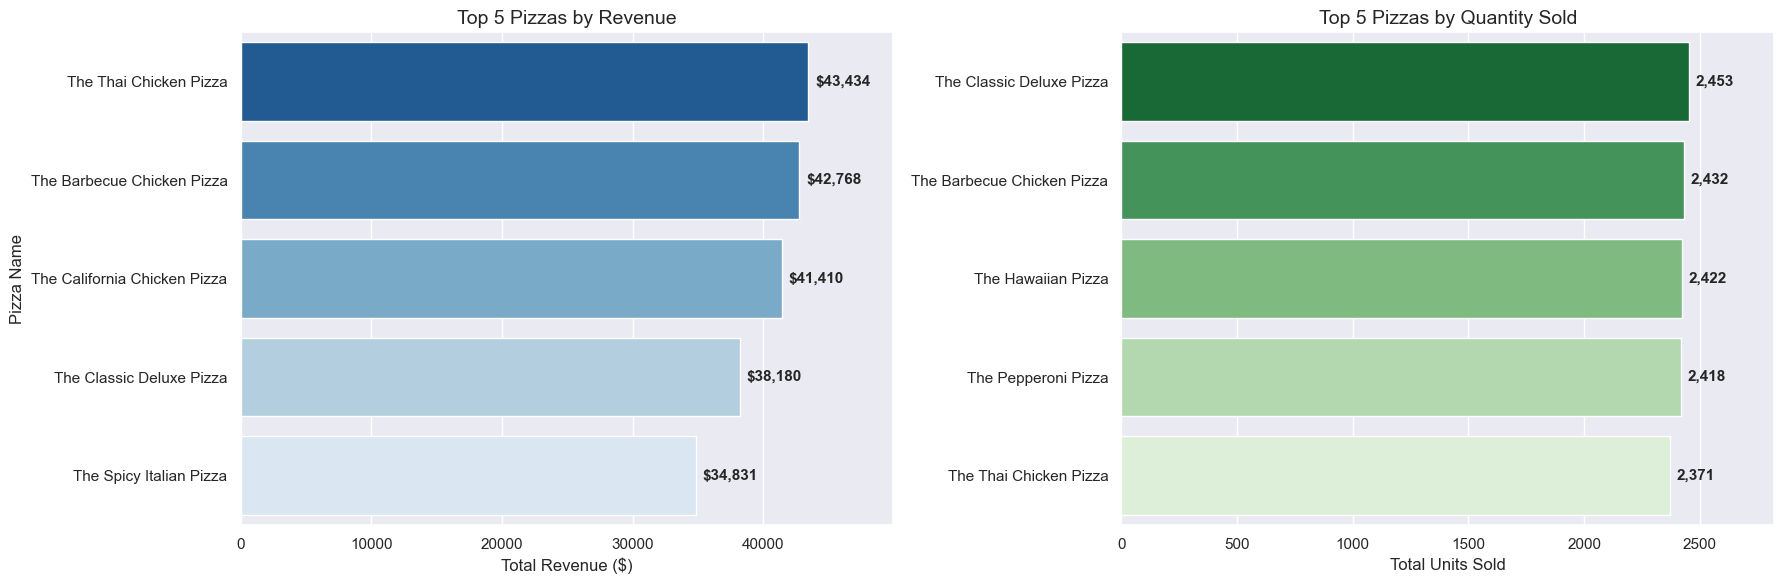

In [35]:
# Create a figure object with 2 subplots side-by-side (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting top 5 revenue earners on the left
sns.barplot(data=top_5_by_revenue, x='revenue', y='name', palette='Blues_r', ax=ax[0])
ax[0].set_title('Top 5 Pizzas by Revenue', fontsize=14)
ax[0].set_xlabel('Total Revenue ($)')
ax[0].set_ylabel('Pizza Name')

# Annotating the left chart
for p in ax[0].patches:
    ax[0].annotate(f'${p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=11, weight='bold')


# Plotting top 5 quantity sellers on the right
sns.barplot(data=top_5_by_quantity, x='quantity', y='name', palette='Greens_r', ax=ax[1])
ax[1].set_title('Top 5 Pizzas by Quantity Sold', fontsize=14)
ax[1].set_xlabel('Total Units Sold')
ax[1].set_ylabel('')

# Annotate Chart 2: Loop through each bar to place the quantity value
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=11, weight='bold')

# Adding extra spaces to the right of each chart so the labels don't get cut off
ax[0].set_xlim(0, top_5_by_revenue['revenue'].max() * 1.15)
ax[1].set_xlim(0, top_5_by_quantity['quantity'].max() * 1.15)

plt.tight_layout() # this automatically clean up spacing between subplots
plt.show()

### **We have a case of Value vs. Volume.**

> 1. The Thai Chicken Pizza, The Barbecue Chicken Pizza, and The Classic Deluxe Pizza appear on both lists.
These are the most successful products. They have high "customer pull" (people want them often) and high "revenue contribution" (they are priced well). They are the backbone of the business.

> 2. The Classic Deluxe is #1 in Quantity (2,453 units) but falls to #4 in Revenue ($38,180.50).
This pizza is likely priced lower than the Chicken pizzas. It is a "crowd-pleaser", extremely popular and high-volume, but since it isn't the top revenue earner, the restaurant relies on selling it in massive quantities to make a significant profit.

> 3. The Thai Chicken and the Barbecue Chicken Pizza are #1 and #2 in Revenue, even though they aren't the most sold by quantity. These pizzas likely have a higher price point. Customers are willing to pay a premium for these specific flavours. The restaurant makes more profit on these than on a Pepperoni or Hawaiian.

> 4. The Hawaiian and the Pepperoni Pizzas are in the Top 5 for Quantity, but they are missing from the Top 5 for Revenue. These are "Budget" pizzas. People buy them in huge numbers (likely because they are classics or cheaper), but they don't drive the big revenue numbers. They are great for getting people in the door, but they aren't the "big money" items.



### **My Key Inference Based on Product Performance**

- There is a clear distinction between Volume Drivers and Revenue Drivers. While the Classic Deluxe Pizza is the most frequently ordered pizza (Volume), the Thai Chicken Pizza generates the most total income (Value). This suggests that the restaurant’s chicken pizzas are perceived as premium products that customers are willing to pay more for, whereas classic options like Pepperoni and Hawaiian serve as high-volume, staple items but does not drive high total income(Value).

### i. Find the sales made in each month. Any trend noticeable?

In [36]:
# Extracting the month from date column

pizza_sales['month_of_the_year'] = pizza_sales['date'].dt.month_name()

# Grouping by month and suming by revenue
monthly_sales = pizza_sales.groupby('month_of_the_year')['revenue'].sum().reset_index()

# Sorting in chronological order (January to December)
# Creating a list of the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Using the categorical method in pandas to force the arrangement of the months to stay the same as created in the list.
monthly_sales['month_of_the_year'] = pd.Categorical(monthly_sales['month_of_the_year'], categories=months_order, ordered=True)

# Sorting the months in their chronological order
monthly_sales = monthly_sales.sort_values('month_of_the_year')
monthly_sales

,month_of_the_year,revenue
4,January,69793.30
3,February,65159.60
7,March,70397.10
0,April,68736.80
8,May,71402.75
6,June,68230.20
5,July,72557.90
1,August,68278.25
11,September,64180.05
10,October,64027.60


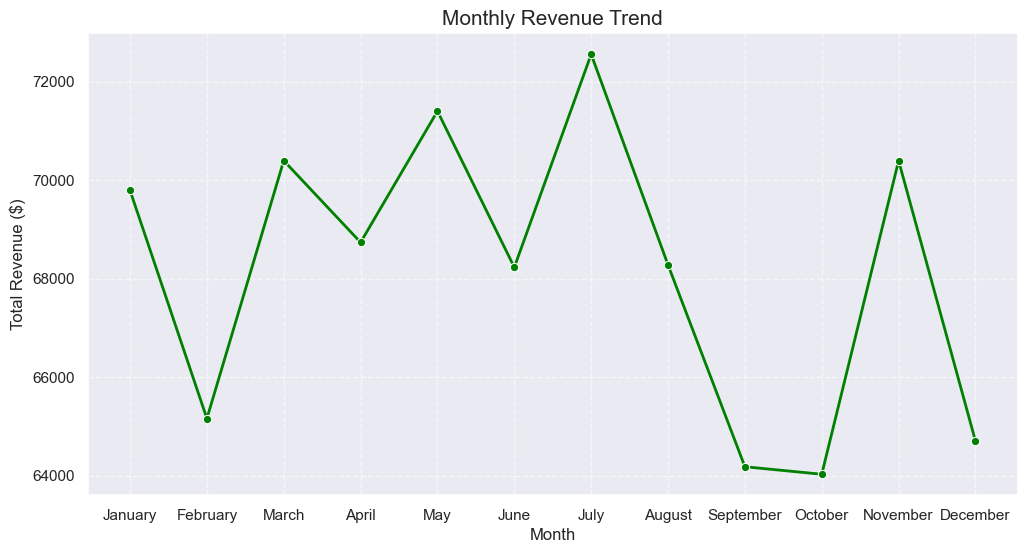

In [37]:
# We need a line chart since this is going to represent sales over periods of time in the year

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month_of_the_year', y='revenue', marker='o', color='green', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

# This gives us the broken grid lines with an opacity of 0.6. The 'True' turns on the grid.
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()            

### **My Noticeable Trends**

1. The Peak (July - $72,557.90): July is the "Golden Month." It’s the highest revenue generator in the entire year.

2. The Valley (October - $64,027.60): October is the slowest month, followed closely by September.

3. The "Bounce Back" (November - $70,395.35): There is a sudden, sharp increase in November before it dips again in December.


### **My Inference from the Chart**
> There is a clear upward trend from January, peaking in July. This suggests that pizza consumption increases during the summer season. The business should consider July as the primary window for high-value promotions or maximum staffing.

> Revenue hits its lowest point in September and October. This correlates with the "Back-to-School" period in many regions, where household spending often shifts away from dining out toward educational expenses. This is a critical period for the restaurant to launch "budget-friendly" deals to maintain foot traffic.

> The significant revenue jump in November (moving from the lowest month to one of the highest) suggests a strong response to year-end festivities or specific holiday events. Interestingly, December shows a slight drop-off, which might suggest that customers prioritize formal dining or home cooking over pizza during the peak of the holiday season.

### j. Are there pizza types that are not doing well on the menu?

### Knowing the low performers is just as important as finding the high performers, because every pizza on the menu costs the restaurant money in ingredients, storage, and kitchen preparation.

In [38]:
# Bottom 5 by Revenue
bottom_5_by_revenue = pizza_sales.groupby('name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=True).head(5)

bottom_5_by_revenue

,name,revenue
2,The Brie Carre Pizza,11588.50
11,The Green Garden Pizza,13955.75
28,The Spinach Supreme Pizza,15277.75
16,The Mediterranean Pizza,15360.50
27,The Spinach Pesto Pizza,15596.00


In [39]:
# Bottom 5 by quantity
bottom_5_by_quantity = pizza_sales.groupby('name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True).head(5)

bottom_5_by_quantity

,name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961


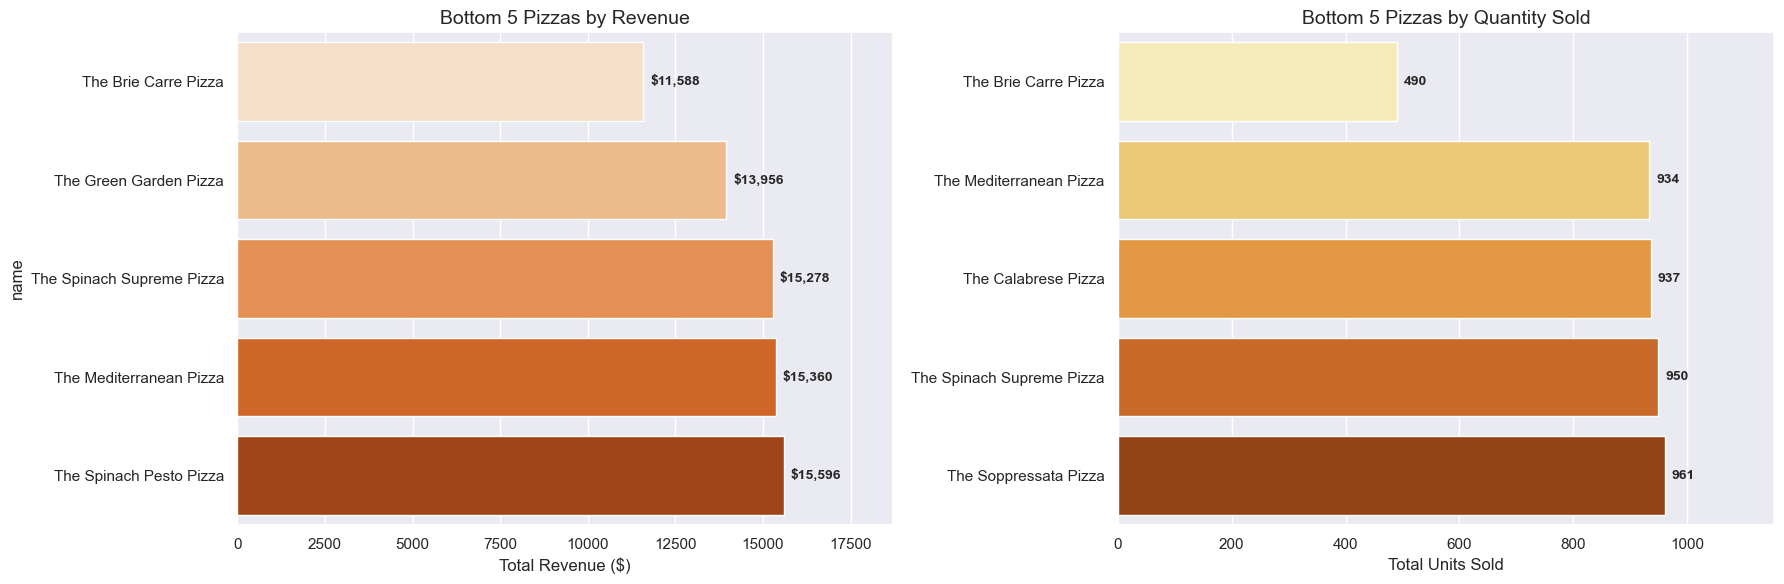

In [40]:
# Create a figure with 1 row and 2 columns of subplots (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Revenue (Left Side)
# Creating horizontal bars using 'revenue' for length and 'name' for categories
sns.barplot(data=bottom_5_by_revenue, x='revenue', y='name', palette='Oranges', ax=ax[0])
ax[0].set_title('Bottom 5 Pizzas by Revenue', fontsize=14)  # this sets the title for the first plot
ax[0].set_xlabel('Total Revenue ($)')                      # this labels the x-axis for revenue

# Annotating Chart 1 (Revenue)
for p in ax[0].patches:                                     # this iterate through each bar in the plot. The 'p' is a placeholder
    ax[0].annotate(f'${p.get_width():,.0f}',                # this creates text: format width as currency with thousands separator
                (p.get_width(), p.get_y() + p.get_height() / 2.), # this positions text at end of bar, vertical center of bar
                ha='left', va='center',                     # this aligns text to the left of the point, centered vertically
                xytext=(5, 0),                              # this offsets text 5 points to the right of the bar end
                textcoords='offset points',                 # this specifies that xytext is an offset in pixels
                fontsize=10, weight='bold')                 # this applies font styling

# Quantity (Right Side)
# Create horizontal bars using 'quantity' for length and 'name' for categories
sns.barplot(data=bottom_5_by_quantity, x='quantity', y='name', palette='YlOrBr', ax=ax[1])
ax[1].set_title('Bottom 5 Pizzas by Quantity Sold', fontsize=14) 
ax[1].set_xlabel('Total Units Sold')
ax[1].set_ylabel('')

# Annotating Chart 2 (Quantity)
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, weight='bold')

# Adding extra spaces to the X-axis limits so labels don't get cut off by the edge
ax[0].set_xlim(0, bottom_5_by_revenue['revenue'].max() * 1.2)
ax[1].set_xlim(0, bottom_5_by_quantity['quantity'].max() * 1.2)

plt.tight_layout() # Automatically adjust subplot parameters for a clean fit
plt.show()

## **My Insight On The Two Categories I Used To Check The Pizzas That Are Doing Poorly** 

1. The "Problem Child": The Brie Carre Pizza
   > I call the Brie Carre Pizza the problem child because you will notice that it is the absolute number 1 worst performer in both Revenue and Quantity. This is a clear candidate for removal. Not only does it have the lowest sales volume (490 units), but its total financial contribution ($11,588.50) is also the lowest. It isn't a premium earner nor a crowd-pleaser.

2. The "Premium Niche" vs. "Budget Failure"
   > The Mediterranean Pizza and The Spinach Supreme Pizza are in the Bottom 5 of both lists. These pizzas are "Dead Weight", so to speak. They sell in low volumes and don't cost enough to make up for those low sales.  Contrast with The Calabrese, notice The Calabrese is in the bottom 5 for Quantity (937 units), but it does not appear in the bottom 5 for Revenue. This suggests that the Calabrese is priced higher. Even though people don't buy it often, it makes enough money per sale to stay off the "Financial Losers" list.
   >
3. The "Vegetarian" Slump
    > Look at the names: Green Garden, Spinach Supreme, Mediterranean, Spinach Pesto. Four out of the five lowest revenue earners are veggie-heavy pizzas. The pizza place might have "over-niched" its veggie options. Instead of having five different veggie pizzas that all perform poorly, they might consider consolidating them into one or two "Super-Veggie" pizzas that use more popular ingredients to drive higher volume.

### <center>**Further Analysis**</center>

#### Let us check for *Category Dominance*.
> We have the **Classic**, **Veggie**, **Supreme**, and **Chicken** categories of pizza.

In [41]:
# Grouping by category and sum revenue/quantity
top_category = pizza_sales.groupby('category').agg({
    'revenue' : 'sum',
    'quantity' : 'sum'
}).reset_index()

# Sorting by revenue
top_category = top_category.sort_values(by='revenue', ascending=False)

top_category

,category,revenue,quantity
1,Classic,220053.10,14888
2,Supreme,208197.00,11987
0,Chicken,195919.50,11050
3,Veggie,193690.45,11649


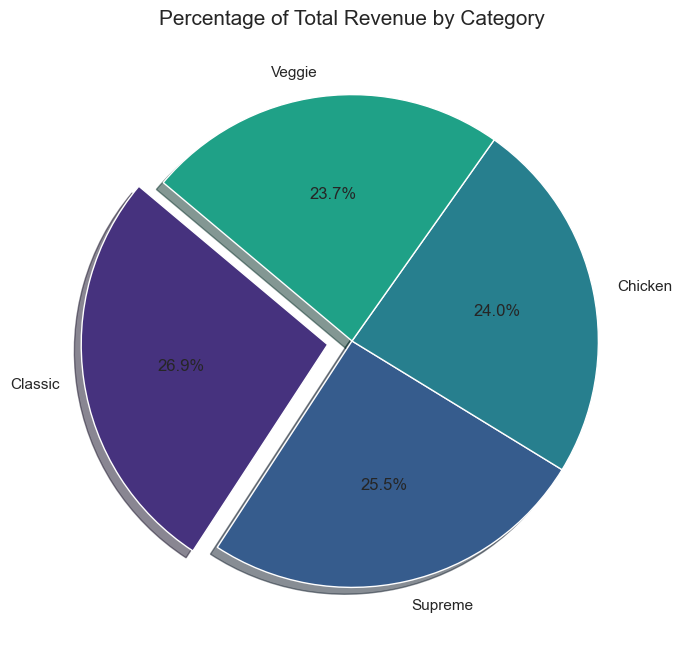

In [42]:
# Since the categories are only four, we will use a pie chart for visualization

# Creating the figure
plt.figure(figsize=(8, 8))

# Defining colors
colors = sns.color_palette('viridis')[0:4]

# Draw the Pie Chart
plt.pie(
    top_category['revenue'], 
    labels=top_category['category'], 
    autopct='%1.1f%%',      # This adds the percentage labels automatically
    startangle=140,         # Rotates the start to make it look balanced
    colors=colors,
    explode=(0.1, 0, 0, 0),  # This "pulls out" the first slice (Classic) for emphasis
    shadow=True
)

plt.title('Percentage of Total Revenue by Category', fontsize=15)
plt.show()

### **My Observation**
> This chart reveals a very healthy, well-balanced business. While we have a clear "winner," the gap between the top and bottom categories is surprisingly small, which is great for business stability.

    1. Classic is the leader in both Revenue ($220,053.10) and Quantity (14,888 units), which gives 26.9%. Traditional flavours remain the primary driver of the business. The fact that it leads in quantity by a wide margin of 2,901 units suggests it contains the most "affordable" or "frequently ordered" staples like Pepperoni or Cheese.

    2. Notice that Supreme has the second-highest revenue ($208,197.00) despite having 2,901 units fewer sales than Classic. Supreme pizzas likely have a higher average price point. The pizza place makes more "money per box" with Supreme than with Classic. This category is your "Profit Margin" leader.

    3. The "Chicken vs. Veggie" Battle
    This is the most interesting part of the table. Look at the Quantity vs. Revenue:
    - Veggie sold more pizzas (11,649 units) than Chicken (11,050 units).
    - Chicken made more money ($195,919.50) than Veggie ($193,690.45).

**My Inference:**
Chicken pizzas are the "Premium" choice. Even though fewer people buy them compared to Veggie options, they generate more total value because they are priced higher. Veggie pizzas are popular volume-wise but contribute less to the bottom line per sale.

#### Since we noticed that Supreme and Chicken seem to make more money per pizza, we can prove it with one last calculation: Average Revenue Per Pizza.$$\text{Avg Price} = \frac{\text{Total Revenue}}{\text{Total Quantity}}$$If we calculate this for each category, we can tell the owner exactly which category is the most "expensive" for the customer.

In [43]:
# Adding a new column to the top_category table and calculating the average
top_category['avg_price_per_unit'] = top_category['revenue'] / top_category['quantity']

# Sorting based on the new column
top_category = top_category.sort_values(by='avg_price_per_unit', ascending=False)

top_category

,category,revenue,quantity,avg_price_per_unit
0,Chicken,195919.50,11050,17.730271
2,Supreme,208197.00,11987,17.368566
3,Veggie,193690.45,11649,16.627217
1,Classic,220053.10,14888,14.780568


## **Observations from the Top-Category Table**
1. I call Classic the "Volume King". It has the highest quantity (14,888 units) but the lowest average price ($14.78). It is the entry-level product that brings people through the door.

2. Chicken is the "Premium Leader" here. It has the lowest quantity (11,050) but the highest average price ($17.73).

3. Chicken and Supreme Pizzas are likely perceived as "specialty" or "luxury" items. Even though they sell less, their higher price point helps them stay competitive in total revenue. For every 5 Classic pizzas sold, the pizza place only needs to sell roughly 4 Chicken pizzas to make the same amount of money.

4. Veggie pizzas have a mid-range price ($16.63) and mid-range volume. This suggests the Vegetarian category is a stable "standard" offering. It isn't a budget choice like the Classic, but it also doesn't command the "premium" that Chicken or Supreme does.

### Size Analysis
In the dataset, sizes range from S (Small) to XXL (Extra Extra Large). Let's see where the money is.

In [44]:
# Grouping by size and calculate total revenue and quantity.
analysis_by_size = pizza_sales.groupby('size').agg({
'revenue' : 'sum',
'quantity': 'sum'}).reset_index()

In [45]:
# Sorting by revenue to see the biggest earners first
analysis_by_size = analysis_by_size.sort_values(by='revenue', ascending=False)
analysis_by_size

,size,revenue,quantity
0,L,375318.70,18956
1,M,249382.25,15635
2,S,178076.50,14403
3,XL,14076.00,552
4,XXL,1006.60,28


In [46]:
# Adding the average price per size (to see the price jumps)
analysis_by_size['avg_price_per_size'] = analysis_by_size['revenue'] / analysis_by_size['quantity']
analysis_by_size

,size,revenue,quantity,avg_price_per_size
0,L,375318.70,18956,19.799467
1,M,249382.25,15635,15.950256
2,S,178076.50,14403,12.363848
3,XL,14076.00,552,25.500000
4,XXL,1006.60,28,35.950000


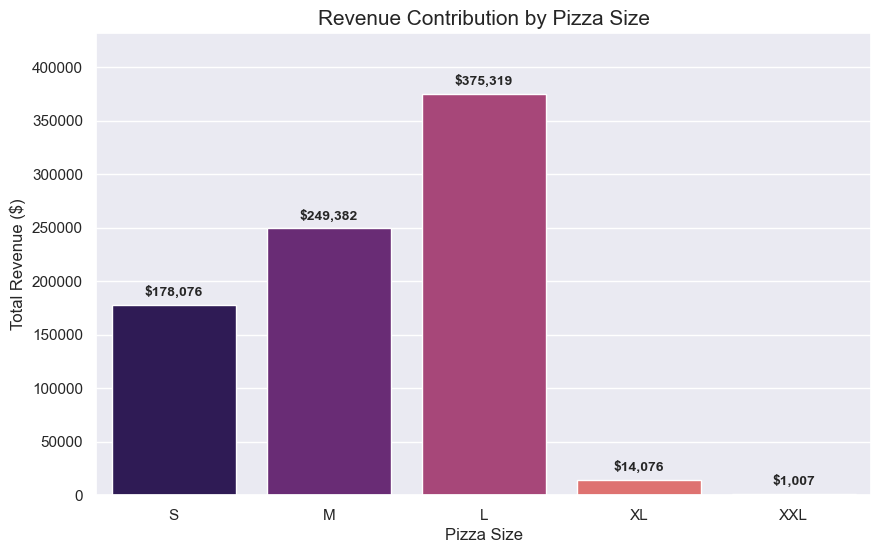

In [47]:
# Since "Size" has a natural order (Small to XXL), a bar chart is perfect here to show the "climb" in revenue.
# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=analysis_by_size, x='size', y='revenue', palette='magma', order=['S', 'M', 'L', 'XL', 'XXL'])

# Add the numbers on top of the bars in the chart for good visualization
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points', 
                fontsize=10, weight='bold') # this sets font styling
plt.title('Revenue Contribution by Pizza Size', fontsize=15)
plt.xlabel('Pizza Size', fontsize=12)
plt.ylabel('Total Revenue ($)')

# Increasing the y-limit slightly to make room for the labels on top
plt.ylim(0, analysis_by_size['revenue'].max() * 1.15) 
plt.show()

### **My Insight and Recommendation**
> The size analysis reveals a highly skewed revenue distribution. The Large size is the primary revenue driver, suggesting a group-oriented customer base. Conversely, the XXL size, despite its high average price per size of $35.95, represents a negligible portion of total sales. I will recommend a menu simplification strategy, potentially phasing out the XXL size to reduce operational overhead without significantly impacting the bottom line.

### Finally let us analyse the ingredients column to see which of the ingredients are the most used and which are the least used.

In [48]:
# Since ingredients are in a string form separated with commas, we have to split and explode them
# Splitting the strings into lists and 'explode' them into individual rows
ingredient_analysis = pizza_sales['ingredients'].str.split(', ').explode()

# Counting the frequency of each ingredient
top_ingredients = ingredient_analysis.value_counts().head(10)
top_ingredients

ingredients
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: count, dtype: int64

In [49]:
# Converting the series to a DataFrame and reset the index
top_ingredients = top_ingredients.reset_index()

# Rename the columns for clarity
top_ingredients.columns = ['Ingredient_Name', 'Usage_Count']

# Display the top 10 of the new DataFrame
top_ingredients.head(10)

,Ingredient_Name,Usage_Count
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


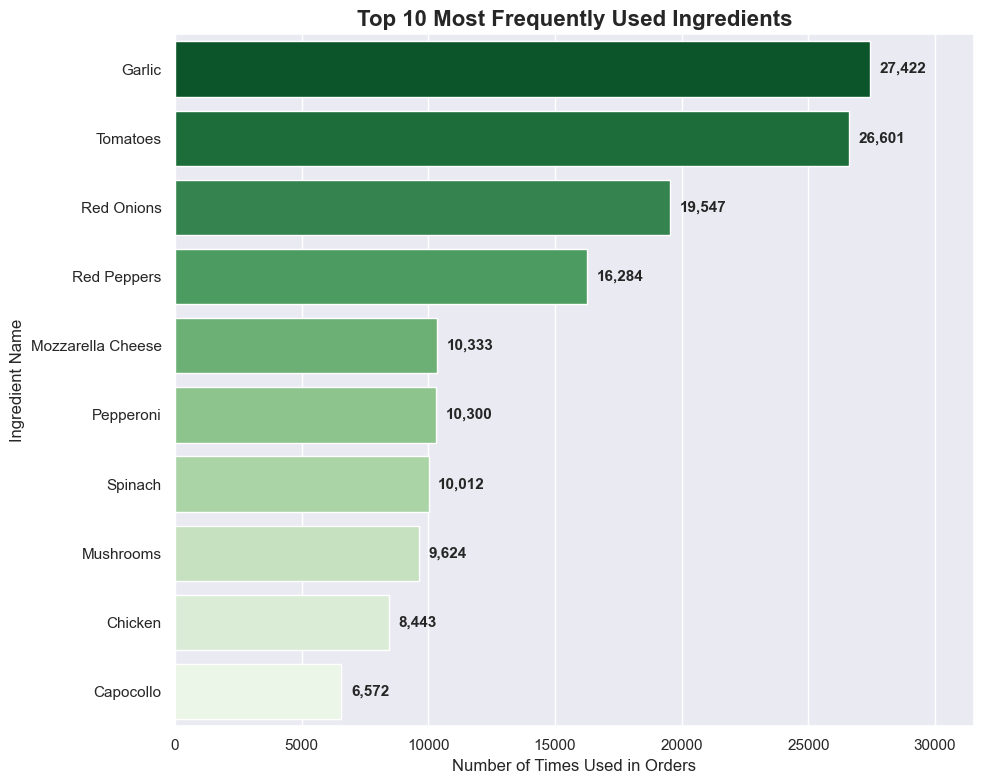

In [50]:
plt.figure(figsize=(10, 8))

# Creating the horizontal bar chart using the new column names
ax = sns.barplot(data=top_ingredients.head(10), # Only plot the top 10 for better focus
                 x='Usage_Count', 
                 y='Ingredient_Name', 
                 palette='Greens_r')

# Annotate the bars with the actual usage numbers
for p in ax.patches:                                 # iterate through each horizontal bar
    ax.annotate(f'{p.get_width():,.0f}',             # get the width (Usage_Count) and format it
                (p.get_width(), p.get_y() + p.get_height() / 2.), # position at the end of the bar
                ha='left', va='center',              # Left-align text at the point, center it vertically
                xytext=(7, 0),                       # push text 7 points to the right
                textcoords='offset points',          # define the push coordinate system
                fontsize=11, weight='bold')          # make the numbers stand out

# Labelling the chart
plt.title('Top 10 Most Frequently Used Ingredients', fontsize=16, weight='bold')
plt.xlabel('Number of Times Used in Orders', fontsize=12)
plt.ylabel('Ingredient Name', fontsize=12)

# Adding extra space to the right so labels don't get cut off
plt.xlim(0, top_ingredients['Usage_Count'].max() * 1.15)

# Cleaning up the layout to avoid overlap
plt.tight_layout()
plt.show()

### **My Insight**
> The chart reveals that Garlic and Tomatoes are the foundational pillars of the menu, appearing in over 26,000 orders each, nearly triple the frequency of core proteins like Chicken or Pepperoni. This high concentration of vegetable-based ingredients (including Red Onions and Peppers) suggests that the restaurant’s brand identity is built on fresh, "gourmet" flavor profiles rather than just basic meat-and-cheese combinations. From an operational standpoint, the business should prioritize long-term, fixed-price contracts for these "Top 4" items; because their usage volume is so massive, even a fractional saving on the unit cost of Garlic or Tomatoes will have a far greater impact on the annual bottom line than a large discount on lower-volume specialty items like Capocollo.

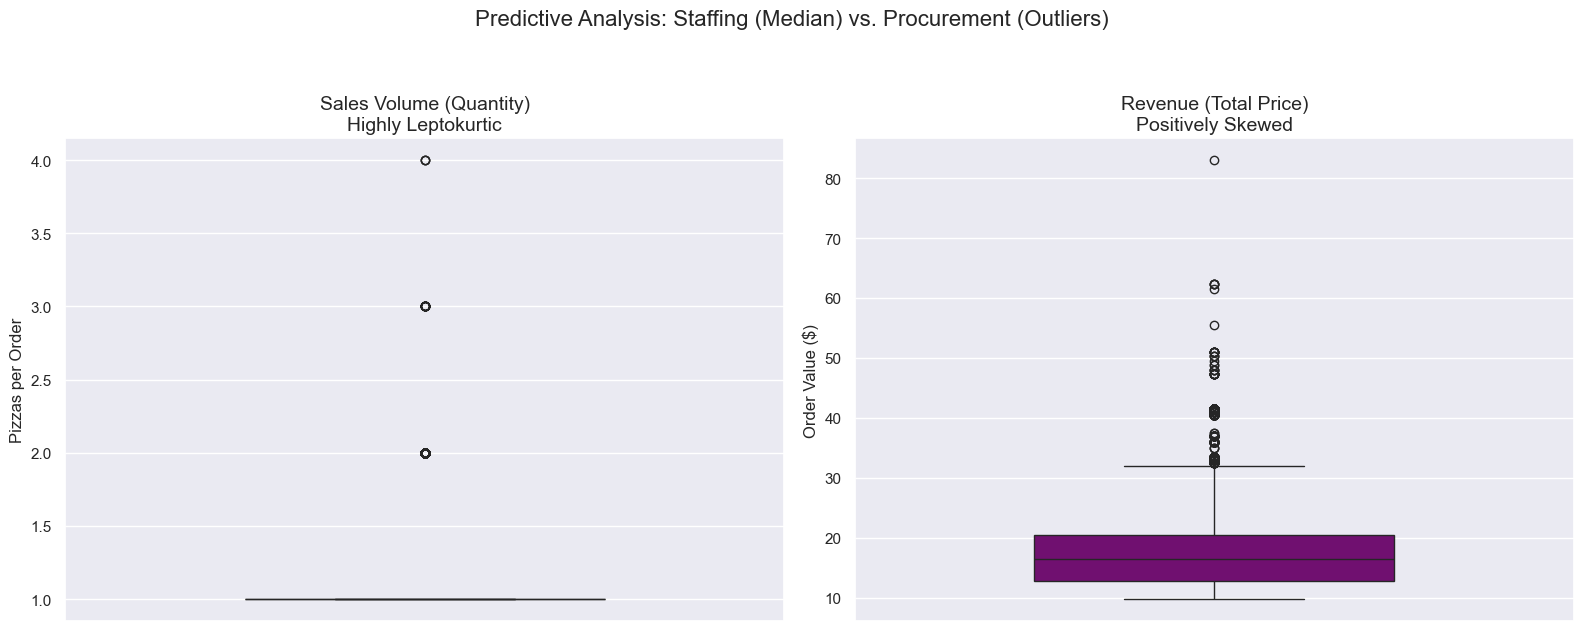

In [51]:
# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Quantity (Sales Volume)
sns.boxplot(y=pizza_sales['quantity'], ax=ax[0], color='teal', width=0.5)
ax[0].set_title('Sales Volume (Quantity)\nHighly Leptokurtic', fontsize=14)
ax[0].set_ylabel('Pizzas per Order')

# Boxplot for Revenue (Order Value)
sns.boxplot(y=pizza_sales['revenue'], ax=ax[1], color='purple', width=0.5)
ax[1].set_title('Revenue (Total Price)\nPositively Skewed', fontsize=14)
ax[1].set_ylabel('Order Value ($)')

# Add an overall title to explain the business logic
plt.suptitle('Predictive Analysis: Staffing (Median) vs. Procurement (Outliers)', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

### **Insights On The Box Plots Above**
#### Our sales volume is highly Leptokurtic (positive kurtosis), indicating extreme consistency in customer behaviour, but the revenue is positively skewed by high-value outliers. We should use the Median to predict daily staffing needs, but use the Mean to calculate total ingredient procurement to ensure we cover those rare, large orders.


1. Staffing Needs: Why use the Median
> Staffing is about labour efficiency. You want to know how many people you need to handle the "typical" flow of customers.
In the Sales Volume (Quantity) box plot, the box is "squashed" at the bottom because most people order exactly one pizza. The Median (the line at 1.0) represents the centre of the crowd.
> Now, if I use the Mean, the "outlier dots" (those rare orders of 3 or 4 pizzas) would pull the average upward. If staff are hired based on that higher average, the employees would spend most of the day standing around idle because the "Typical Day" only requires enough hands for single-pizza orders. Because the data is highly peaked(positive kurtosis), the Median is the most reliable predictor of the minute-to-minute workload.


2. Procurement Needs: Why use the Mean
> Procurement (buying ingredients like flour, cheese, and toppings) is about risk management. You never want to tell a customer, "We’ve run out of dough." Unlike the Median, the Mean accounts for every single item sold, including the extreme outliers. It "shares" the total volume across all orders.
> If you only buy enough cheese for the Median (1 pizza per order), you will be perfectly prepared for 90% of your customers. However, the moment an outlier walks in, they will immediately run out of stock.
> The Revenue and Quantity distributions are Positively Skewed, meaning there is a long tail of rare but high-volume orders. The Mean captures the "Total Weight" of that tail, ensuring your fridge always has enough "buffer" to handle those rare large orders without a stockout.

* In summary, you are essentially using the Median to protect the Labour Budget (minimising waste) and the Mean to protect the Service Reputation (maximising availability).
